This is to record my process of analyzing the dataset of speed dating. :)

The main problem or to say the target of my analysis is to find out the likelyhood a person can get a second date, which I transformed into the number of calls they got after the speed dating. Notice that on the one hand, the rules of speed dating is actually complicated with ten waves and each person can join more than one wave with different partners so I took 'iid' as key value and drop the information about the partner they are dating(this analysis focused on the features of the person himself/herself). On the other hand, the target that I was trying to predict is null in some rows so I dropped those rows to get the dataset for training. Those are the reasons why my dataset is not as large as it was originally.

Now let's get started!

In [588]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
dataset=pd.read_csv("D:\PyCharm Community Edition 2020.1.3\datasets\Speed Dating Data.csv",encoding="unicode_escape")

In [589]:
pd.set_option('display.max_columns', None)
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [606]:
##### data1 is for problem1: why someone could get calls from others?
data1=dataset[['iid','age','field','undergra','mn_sat','tuition','race','imprace','imprelig','from','zipcode','income','goal','date','go_out',
               'career','sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
               'movies','concerts','music','shopping','yoga','exphappy','expnum','them_cal']]
data1=data1.drop_duplicates()
ori=data1[data1['them_cal'].notnull()]

In [608]:
ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 8356
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       263 non-null    int64  
 1   age       262 non-null    float64
 2   field     262 non-null    object 
 3   undergra  131 non-null    object 
 4   mn_sat    88 non-null     object 
 5   tuition   101 non-null    object 
 6   race      262 non-null    float64
 7   imprace   262 non-null    float64
 8   imprelig  262 non-null    float64
 9   from      262 non-null    object 
 10  zipcode   231 non-null    object 
 11  income    151 non-null    object 
 12  goal      262 non-null    float64
 13  date      262 non-null    float64
 14  go_out    262 non-null    float64
 15  career    262 non-null    object 
 16  sports    262 non-null    float64
 17  tvsports  262 non-null    float64
 18  exercise  262 non-null    float64
 19  dining    262 non-null    float64
 20  museums   262 non-null    float

Text(0, 0.5, 'times')

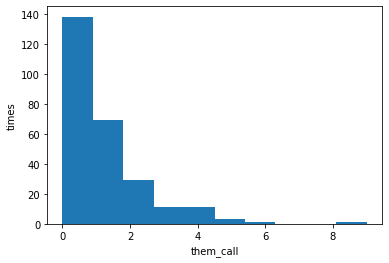

In [591]:
#ori[['Embarked','Survived']].groupby(ori['them_cal']).sum().plot.bar()
plt.hist(ori['them_cal'])
plt.xlabel('them_call')
plt.ylabel('times')

Notice that most people can only get one or two calls from partners and the number of those who get more than 3 calls are not large enough for later works. So I put those people into the same class to increase the samples in that subset.

In [593]:
cn=0
for times in ori['them_cal'].values:
    if times>2:
        cn=cn+1
for iid in range(ori.shape[0]):
    if ori['them_cal'].iloc[iid]>2:
        ori['them_cal'].iloc[iid]=3

The next step is to encode the catogorical features. I tried target encoding this time. You can also try other ways of encoding such as label encoding/count encoding/CatBoost encoding, or the most common way--one-hot encoding(which will increase the number of columns so I did not choose for this time).

In [594]:
#encode the categorical features using Target encoding
import category_encoders as ce
cat_features=['field','undergra','tuition','from','zipcode','career','income','mn_sat']
target_enc = ce.TargetEncoder(cols=cat_features)
target_enc.fit(ori[cat_features], ori['them_cal'])

# Transform the features, rename the columns with _target suffix, and join to dataframe
trainTest_TE = ori.join(target_enc.transform(ori[cat_features]).add_suffix('_target'))
#valid_TE = x_test.join(target_enc.transform(x_test[cat_features]).add_suffix('_target'))
trainTest=trainTest_TE.drop(columns=['field','undergra','tuition','from','zipcode','career','income','mn_sat'])
#valid=valid_TE.drop(columns=['field','undergra','tuition','from','zipcode','career','income','mn_sat'])


In [ ]:
##impute missing value(try scikit-learn method this time)
### missing values are mostly in columns 'expnum','field_target','undergra_target','tuition_target',^(all the encoding-cause columns)
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(train)
#IterativeImputer(random_state=0)
#imp.transform(valid)
#print(train.info())

Now starting to fill in the missing values in dataset. I tried to predict the value of missing ones according to the relationship between them.

In [601]:
try_set=trainTest_TE[['field_target','undergra_target','tuition_target','from_target','zipcode_target','career_target','income_target','mn_sat_target']].join(ori['them_cal'])

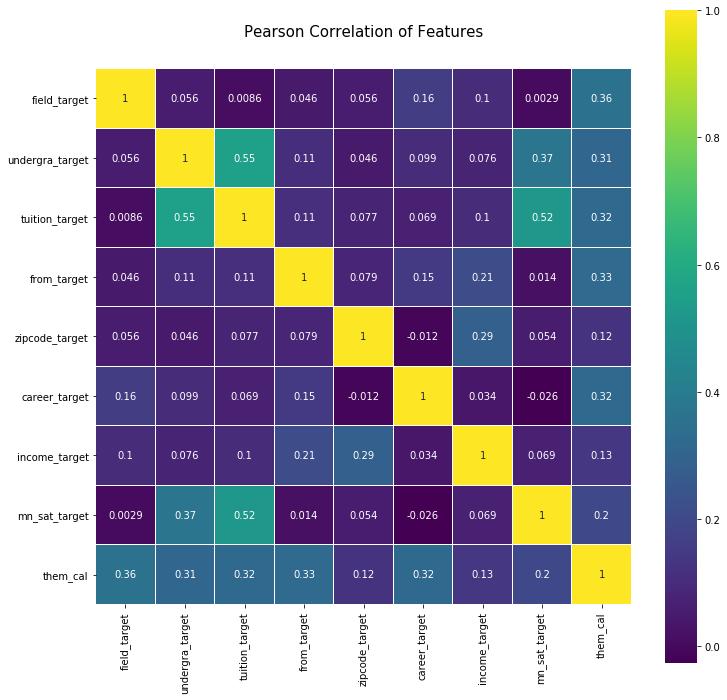

In [603]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(try_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Since missing value in feature 'expnum'(which means the number of calls the person expect) is too much, I dropped this column.

In [508]:
trainTest=trainTest.drop(columns=['expnum'])

Missing values in features of tuition_target,career_target,income_target,from_target,field_target,mn_sat_target and zipcode_target all need to be imputed. Here I used mice to calculate the missing value according to the other features. And according to the correlation between target-'them_cal' and other features, tuition_target and from_target seemed rather important. I used random forest model to predict those two features this time.

In [509]:
from impyute.imputation.cs import mice
trainTest_without=trainTest.drop(columns=['tuition_target','from_target'])
# start the MICE training
trainTest_be=mice(trainTest_without.values)
trainTest1=pd.DataFrame(trainTest_be,columns=trainTest_without.columns)
trainTestf=trainTest1.join(trainTest['tuition_target','from_target'])

In [ ]:
trainTest2=trainTestf[['tuition_target','career_target','income_target','field_target']]
tuition_notMissing_col=trainTest2[trainTest2['tuition_target'].notnull()].drop(columns=['tuition_target'])
tuition_notMissing_target=trainTest2[trainTest2['tuition_target'].notnull()]['tuition_target']
tuition_Missing_col=trainTest2[trainTest2['tuition_target'].isnull()].drop(columns=['tuition_target'])

In [ ]:
trainTest3=trainTestf[['from_target','career_target','income_target','field_target']]
from_notMissing_col=trainTest3[trainTest3['from_target'].notnull()].drop(columns=['from_target'])
from_notMissing_target=trainTest3[trainTest3['from_target'].notnull()]['from_target']
from_Missing_col=trainTest3[trainTest3['from_target'].isnull()].drop(columns=['from_target'])

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  

def impute_missing(notMissing_col,notMissing_target,missingSet_col):
    rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
    rfr.fit(notMissing_col,notMissing_target)
    missingSet_target=rfr.predict(missingSet_col)
    rfr.score(notMissing_col,notMissing_result)
    return missingSet_target
trainTest.loc[trainTest['tuition_target'].isnull(),'tuition_target']=impute_missing(tuition_notMissing_col,tuition_notMissing_target,tuition_Missing_col)
trainTest.loc[trainTest['from_target'].isnull(),'from_target']=impute_missing(from_notMissing_col,from_notMissing_target,from_Missing_col)


In [537]:
train_targeta= trainTest['them_cal']
train_cola=trainTest.drop(columns=['them_cal'])

In [538]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set`
x_train, x_test, y_train, y_test = train_test_split(train_cola, train_targeta, test_size=0.33, random_state=42)

To avoid the problem of overfitting, I decreased the number of dimensions involved by PCA. I choosed the first three pricipal components, whose explained variance are larger than 0.1.

In [539]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components = 3 ,svd_solver = 'auto')
pca.fit(x_train[['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
               'movies','concerts','music','shopping','yoga']])
train1 = pca.transform(x_train[['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
               'movies','concerts','music','shopping','yoga']])
test1 = pca.transform(x_test[['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
               'movies','concerts','music','shopping','yoga']])

In [353]:
pca.explained_variance_ratio_

array([0.20364251, 0.1452092 , 0.1088017 ])

In [540]:
train1=pd.DataFrame(train1,columns=['pca1','pca2','pca3'])
test1=pd.DataFrame(test1,columns=['pca1','pca2','pca3'])

In [541]:
x_train=x_train.drop(columns=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
              'movies','concerts','music','shopping','yoga'])
x_train_f=pd.concat([x_train,train1],axis=1,join='inner')

x_test=x_test.drop(columns=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',
               'movies','concerts','music','shopping','yoga'])
x_test_f=pd.concat([x_test,test1],axis=1,join='inner')


In [549]:
x_train_f=x_train_f.drop(columns=['iid'])
x_test_f=x_test_f.drop(columns=['iid'])

Finish the feature scaling part.

In [550]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train_f)
# Apply transform to both the training set and the test set.
train= scaler.transform(x_train_f)
test = scaler.transform(x_test_f)
x_train=pd.DataFrame(train,columns=[ 'age', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out',
       'exphappy', 'field_target', 'undergra_target', 'tuition_target',
       'from_target', 'zipcode_target', 'career_target', 'income_target',
       'mn_sat_target', 'pca1', 'pca2', 'pca3'])
x_test=pd.DataFrame(test,columns=[ 'age', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out',
       'exphappy', 'field_target', 'undergra_target', 'tuition_target',
       'from_target', 'zipcode_target', 'career_target', 'income_target',
       'mn_sat_target', 'pca1', 'pca2', 'pca3'])

In [556]:
t=pd.concat([x_train,y_train],axis=1,join='inner')
train_target=t['them_cal']
train_col=t.drop(columns='them_cal')

m=pd.concat([x_test,y_test],axis=1,join='inner')
test_target=m['them_cal']
test_col=m.drop(columns='them_cal')


In [ ]:
Selecting better parameters using gridSearchCV.

In [ ]:
##gridsearchCV (for searching best parameter)
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
#parameters to choose from
param_grid = {'C': [0.0001,0.001,0.1, 1, 10, 100, 1000],  
              'gamma': [0.00001,0.001, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly','sigmod']}  
  
grid = GridSearchCV(SVC(), param_grid) 
grid.fit(x_train_f,y_train)
print(grid.best_score_,grid.best_params_)
dict_param={}
def get_better_param(model,model_to_set,param_grid,traincol,trainTarget):
    grid_search = GridSearchCV(model_to_set,param_grid=param_grid,scoring='f1_weighted') 
    #X_train,X_test,y_train,y_test = train_test_split(traincol,trainTarget,random_state=10)
    grid_search.fit(traincol,trainTarget) 
    print("Best parameters:{} for {}".format(grid_search.best_params_,model_to_set))
    dict_param[model]=grid_search.best_params
    print("Best score on train set:{:.2f}".format(grid_search.best_score_))
    return dict_param
model_to_set=OneVsRestClassifier(SVC())
dict_param_SVM=get_better_param(svm,model_to_set,param_grid_SVM,train,y_train)
#print(estimator.get_params().keys())
#linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

Notice that when using svm model, choose the "one versus rest' mode to " to predict target with more than 2 values in it.

In [473]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
model_to_set = OneVsRestClassifier(SVC())
parameters = {
    "estimator__C": [0.03,0.3,1,3,10,100,1000],
    "estimator__kernel": ["rbf","sigmod","poly"],
    "estimator__degree":[1, 2, 3, 4]}

svc = GridSearchCV(model_to_set, param_grid=parameters)

svc.fit(x_train_f, y_train)

print(svc.best_score_)
print(svc.best_params_)

0.5253623188405797
{'estimator__C': 100, 'estimator__degree': 2, 'estimator__kernel': 'poly'}


In [478]:
from sklearn.ensemble import RandomForestClassifier

param_grid={'max_depth':[3,5,6,7,8,9,10,11,12,13,14,15,16,17]}
tree_model = RandomForestClassifier()
rf=GridSearchCV(tree_model,param_grid)
rf.fit(x_train_f, y_train)

print(rf.best_params_)

{'max_depth': 13}


In [479]:
from sklearn.ensemble import AdaBoostClassifier
param_grid={'n_estimators':[10,30,100,300],'learning_rate':[0.01,0.1,0.3,1,3,10]}
adb=AdaBoostClassifier()
ad=GridSearchCV(adb,param_grid)
ad.fit(x_train_f, y_train)
print(ad.best_params_)

{'learning_rate': 0.01, 'n_estimators': 30}


In [ ]:
On the last step I used stacking to ensemble.

In [558]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = train_col.shape[0]
ntest = test_col.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS, shuffle=False)

def get_kfold_predict(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
rf = RandomForestClassifier(n_estimators=500, warm_start=True, max_features='sqrt',max_depth=13, 
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=30, learning_rate=0.01)

svm=SVC(C= 100,gamma= 2, kernel='poly')
#gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

rf_oof_train, rf_oof_test = get_kfold_predict(rf, train_col, train_target, test_col) # Random Forest
ada_oof_train, ada_oof_test = get_kfold_predict(ada, train_col, train_target, test_col) # AdaBoost 
svm_oof_train, svm_oof_test = get_kfold_predict(svm, train_col, train_target, test_col) # Gradient Boost

x_train = np.concatenate((rf_oof_train, ada_oof_train, svm_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, svm_oof_test), axis=1)

from xgboost import XGBClassifier

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, nthread= -1, scale_pos_weight=1).fit(x_train, train_target)
predictions = gbm.predict(x_test)
#StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
#StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')